In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip /content/drive/MyDrive/Colab\ Notebooks/BraTs2019S.zip -d /content/


Archive:  /content/drive/MyDrive/Colab Notebooks/BraTs2019S.zip
   creating: /content/Testing/
   creating: /content/Training/
   creating: /content/Validation/
   creating: /content/Training/HGG/
   creating: /content/Training/LGG/
   creating: /content/Training/HGG/BraTS19_2013_10_1/
   creating: /content/Training/HGG/BraTS19_2013_11_1/
   creating: /content/Training/HGG/BraTS19_2013_12_1/
   creating: /content/Training/HGG/BraTS19_2013_13_1/
   creating: /content/Training/HGG/BraTS19_2013_14_1/
   creating: /content/Training/HGG/BraTS19_2013_17_1/
   creating: /content/Training/HGG/BraTS19_2013_18_1/
   creating: /content/Training/HGG/BraTS19_2013_19_1/
   creating: /content/Training/HGG/BraTS19_2013_20_1/
   creating: /content/Training/HGG/BraTS19_2013_21_1/
   creating: /content/Training/HGG/BraTS19_2013_22_1/
   creating: /content/Training/HGG/BraTS19_2013_23_1/
   creating: /content/Training/HGG/BraTS19_2013_25_1/
   creating: /content/Training/HGG/BraTS19_2013_26_1/
   creating

In [3]:
! pip install nibabel

In [4]:
import nibabel as nib
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from skimage.transform import resize

In [5]:

import os
import shutil

# Function to count files in a directory with specific extensions
def count_files_in_dir(directory, extensions):
    count = 0
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(extensions):
                count += 1
    return count

# Paths to the directories
hgg_path = '/content/Training/HGG'
lgg_path = '/content/Training/LGG'

# Define the extensions to look for
extensions = ('.nii.gz',)

# Count the number of files in each directory
hgg_count = count_files_in_dir(hgg_path, extensions)
lgg_count = count_files_in_dir(lgg_path, extensions)

print(f'HGG Images: {hgg_count}')
print(f'LGG Images: {lgg_count}')
print(f'total: {hgg_count+lgg_count}')

HGG Images: 825
LGG Images: 245
total: 1070


In [6]:

import os
import random
import shutil

# Define the source folder containing all the images
source_folder = "/content/Training"

# Define the destination root folders for training, testing, and validation sets
training_root = "/content/training"
testing_root = "/content/testing"
validation_root = "/content/validation"

# Define the counts for each set
training_count = 700
testing_count = 300
validation_count = 70

# Function to move images to their respective class folders
def split_images(source_folder, destination_root, count):
    # Create destination root folder if it doesn't exist
    os.makedirs(destination_root, exist_ok=True)

    # Get a list of all image paths
    image_paths = []
    for root, dirs, files in os.walk(source_folder):
        for file in files:
            if file.endswith(".nii.gz"):
                image_paths.append(os.path.join(root, file))

    # Randomly shuffle the image paths
    random.shuffle(image_paths)

    # Get the destination folder for each class
    hgg_destination = os.path.join(destination_root, "HGG")
    lgg_destination = os.path.join(destination_root, "LGG")

    # Create class folders if they don't exist
    os.makedirs(hgg_destination, exist_ok=True)
    os.makedirs(lgg_destination, exist_ok=True)

    # Move images to the respective class folders based on the count
    hgg_count = count // 2
    lgg_count = count - hgg_count

    hgg_images = image_paths[:hgg_count]
    lgg_images = image_paths[hgg_count:count]

    for img in hgg_images:
        shutil.move(img, hgg_destination)

    for img in lgg_images:
        shutil.move(img, lgg_destination)

# Split images for training set
split_images(source_folder, training_root, training_count)

# Split images for testing set
split_images(source_folder, testing_root, testing_count)

# Split images for validation set
split_images(source_folder, validation_root, validation_count)

print("Images have been successfully split into training, testing, and validation sets.")


Images have been successfully split into training, testing, and validation sets.


In [7]:

import os

# Define the root folders for training, testing, and validation sets
training_root = "/content/training"
testing_root = "/content/testing"
validation_root = "/content/validation"

# Function to count and iterate through images in a folder
def count_and_iterate(folder):
    total_images = 0
    print(f"Images in {folder}:")
    for root, dirs, files in os.walk(folder):
        for file in files:
            if file.endswith(".nii.gz"):
                total_images += 1
                print(os.path.join(root, file))
    return total_images

# Count and iterate through images in the training set
training_total = count_and_iterate(training_root)
print("Total images in training set:", training_total)

# Count and iterate through images in the testing set
testing_total = count_and_iterate(testing_root)
print("Total images in testing set:", testing_total)

# Count and iterate through images in the validation set
validation_total = count_and_iterate(validation_root)
print("Total images in validation set:", validation_total)


Images in /content/training:
/content/training/HGG/BraTS19_CBICA_ARW_1_seg.nii.gz
/content/training/HGG/BraTS19_2013_29_1_t1.nii.gz
/content/training/HGG/BraTS19_CBICA_BGT_1_t1ce.nii.gz
/content/training/HGG/BraTS19_CBICA_BGN_1_t2.nii.gz
/content/training/HGG/BraTS19_CBICA_AZD_1_seg.nii.gz
/content/training/HGG/BraTS19_TCIA09_493_1_t1.nii.gz
/content/training/HGG/BraTS19_CBICA_AYG_1_t1ce.nii.gz
/content/training/HGG/BraTS19_TCIA10_299_1_t2.nii.gz
/content/training/HGG/BraTS19_CBICA_ASR_1_seg.nii.gz
/content/training/HGG/BraTS19_TCIA03_419_1_flair.nii.gz
/content/training/HGG/BraTS19_CBICA_APR_1_t1ce.nii.gz
/content/training/HGG/BraTS19_TCIA10_276_1_flair.nii.gz
/content/training/HGG/BraTS19_CBICA_ALU_1_t1.nii.gz
/content/training/HGG/BraTS19_CBICA_ASO_1_seg.nii.gz
/content/training/HGG/BraTS19_CBICA_ANP_1_t2.nii.gz
/content/training/HGG/BraTS19_CBICA_AQJ_1_seg.nii.gz
/content/training/HGG/BraTS19_CBICA_ABY_1_seg.nii.gz
/content/training/HGG/BraTS19_CBICA_AAB_1_t1.nii.gz
/content/traini

In [8]:
import os

# Define the root folders for training, testing, and validation sets
training_root = "/content/training"
testing_root = "/content/testing"
validation_root = "/content/validation"

# Function to count and iterate through images in a folder
def count_and_iterate(folder):
    total_images = 0
    print(f"Images in {folder}:")
    for root, dirs, files in os.walk(folder):
        for file in files:
            if file.endswith(".nii.gz"):
                total_images += 1
                print(os.path.join(root, file))
    return total_images

# Count and iterate through images in the training set
training_total = count_and_iterate(training_root)

# Count and iterate through images in the testing set
testing_total = count_and_iterate(testing_root)

# Count and iterate through images in the validation set
validation_total = count_and_iterate(validation_root)

# Calculate total images
total_images = training_total + testing_total + validation_total

# Print the counts in the specified format
print("\nTotal Images:", total_images)
print("Training Images:", training_total)
print("Validation Images:", validation_total)
print("Testing Images:", testing_total)


Images in /content/training:
/content/training/HGG/BraTS19_CBICA_ARW_1_seg.nii.gz
/content/training/HGG/BraTS19_2013_29_1_t1.nii.gz
/content/training/HGG/BraTS19_CBICA_BGT_1_t1ce.nii.gz
/content/training/HGG/BraTS19_CBICA_BGN_1_t2.nii.gz
/content/training/HGG/BraTS19_CBICA_AZD_1_seg.nii.gz
/content/training/HGG/BraTS19_TCIA09_493_1_t1.nii.gz
/content/training/HGG/BraTS19_CBICA_AYG_1_t1ce.nii.gz
/content/training/HGG/BraTS19_TCIA10_299_1_t2.nii.gz
/content/training/HGG/BraTS19_CBICA_ASR_1_seg.nii.gz
/content/training/HGG/BraTS19_TCIA03_419_1_flair.nii.gz
/content/training/HGG/BraTS19_CBICA_APR_1_t1ce.nii.gz
/content/training/HGG/BraTS19_TCIA10_276_1_flair.nii.gz
/content/training/HGG/BraTS19_CBICA_ALU_1_t1.nii.gz
/content/training/HGG/BraTS19_CBICA_ASO_1_seg.nii.gz
/content/training/HGG/BraTS19_CBICA_ANP_1_t2.nii.gz
/content/training/HGG/BraTS19_CBICA_AQJ_1_seg.nii.gz
/content/training/HGG/BraTS19_CBICA_ABY_1_seg.nii.gz
/content/training/HGG/BraTS19_CBICA_AAB_1_t1.nii.gz
/content/traini

In [9]:
!pip install SimpleITK


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 8.3 MB/s eta 0:00:00


Displaying HGG images...


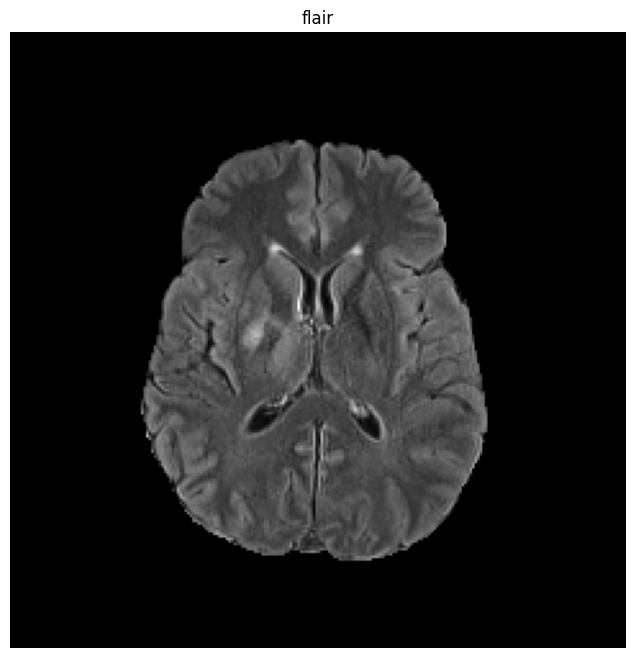

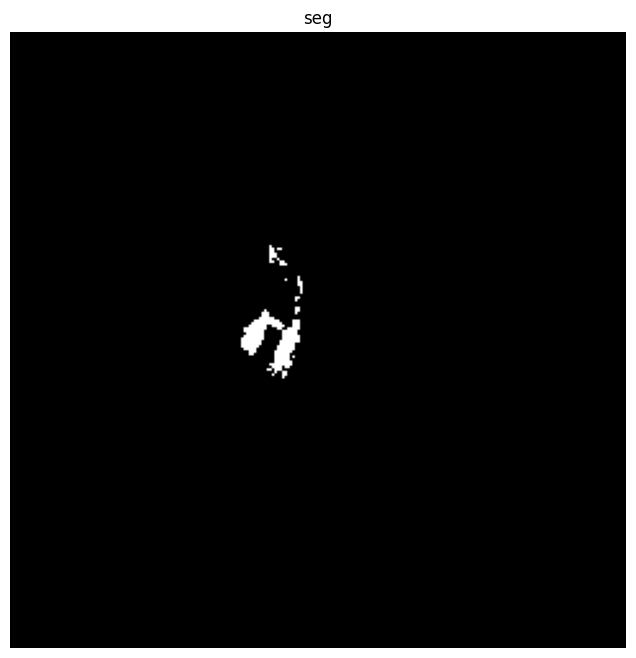

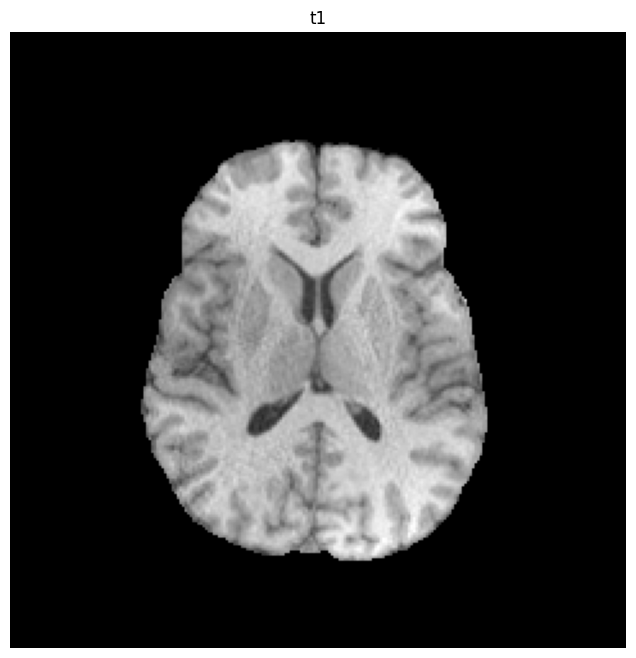

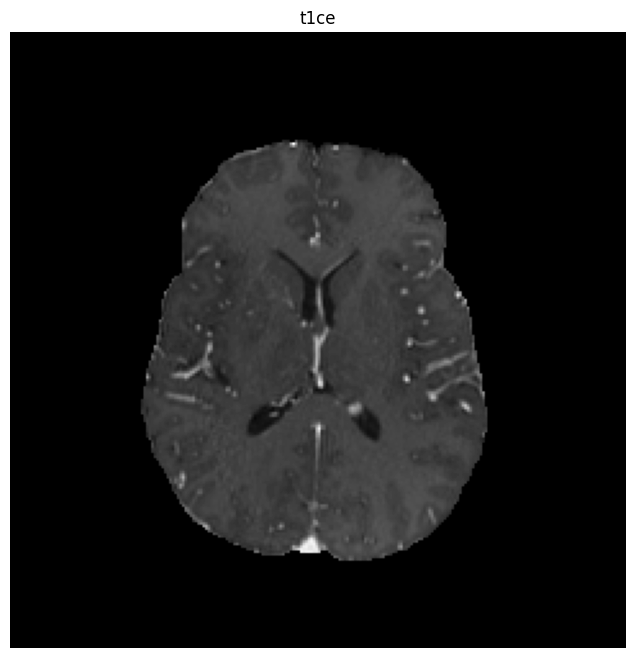

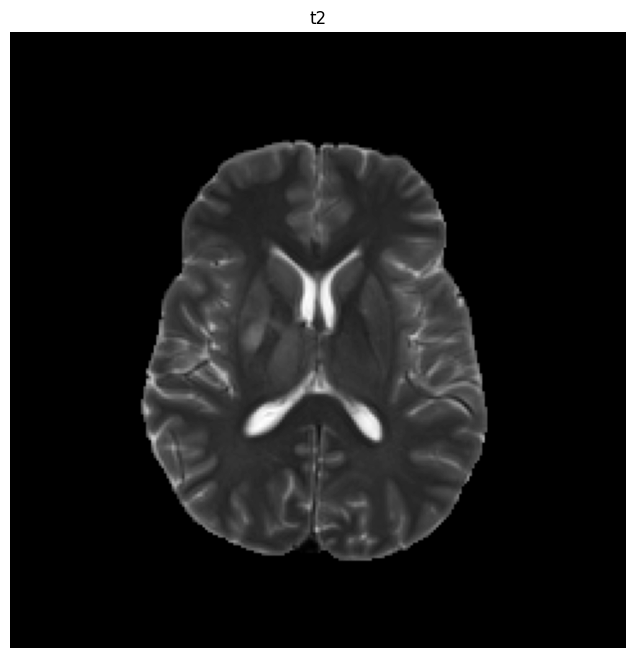

Displaying LGG images...


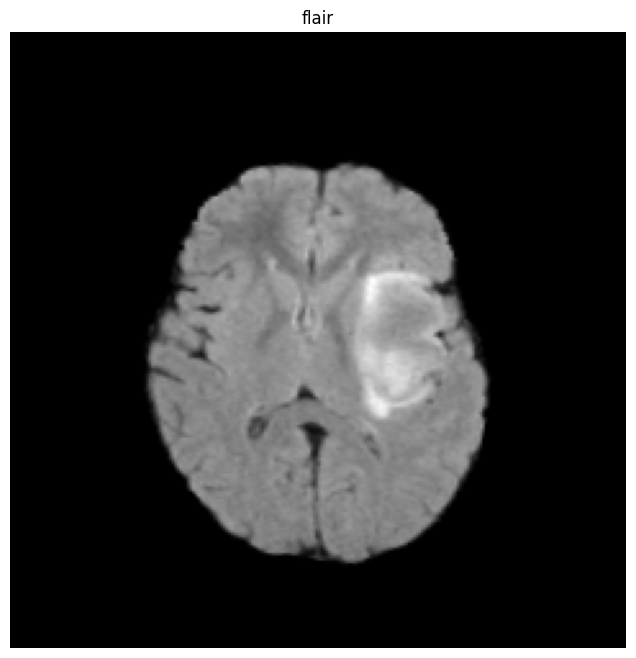

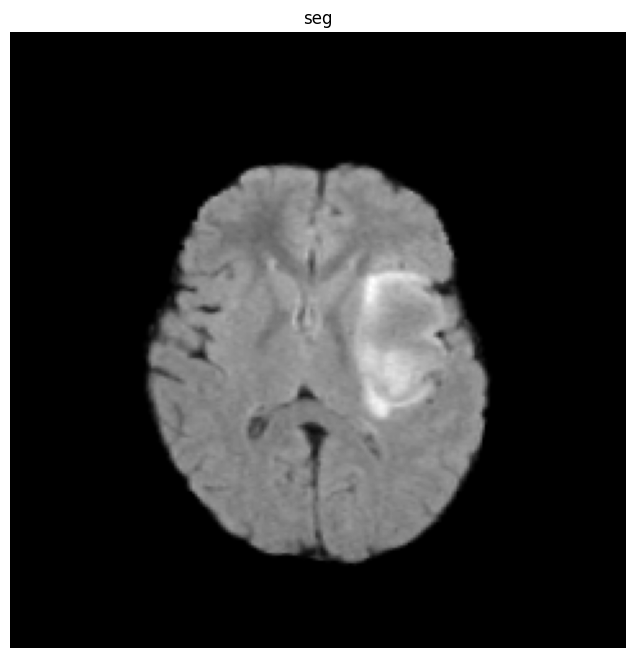

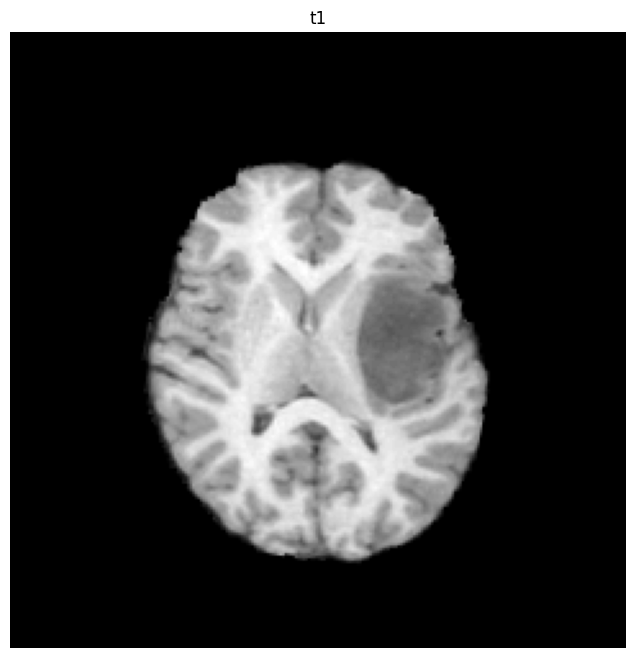

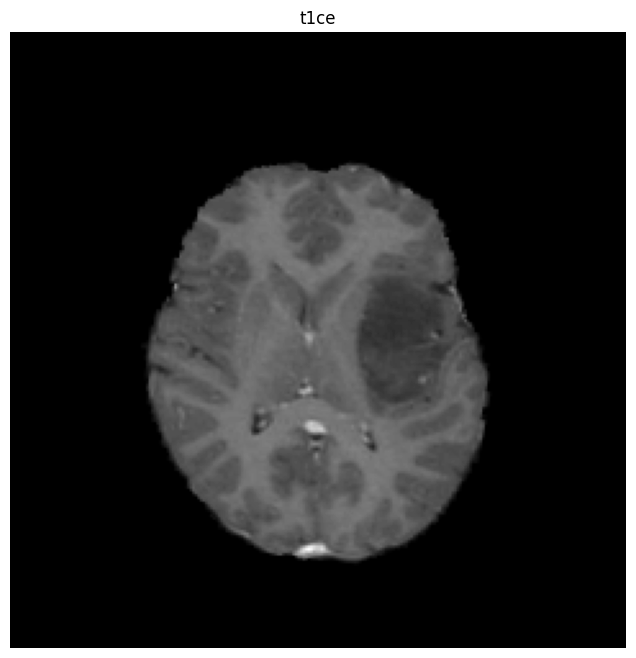

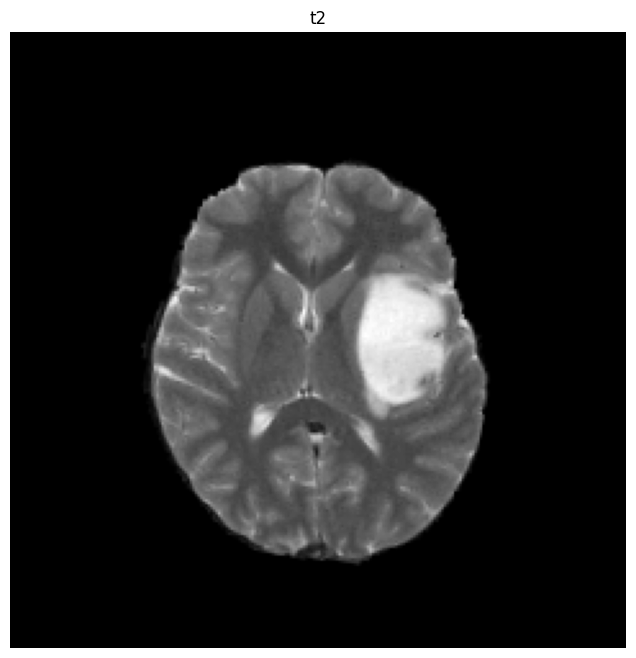

In [10]:

import os
import random
import matplotlib.pyplot as plt
import SimpleITK as sitk

# Function to display images from given paths
def display_images_from_paths(paths, titles, num_images_to_display):
    for i in range(num_images_to_display):
        img_path = paths[i]

        # Load the NIfTI image using SimpleITK
        img = sitk.ReadImage(img_path)
        img_array = sitk.GetArrayFromImage(img)

        # Display the image slice
        plt.figure(figsize=(8, 8))
        plt.imshow(img_array[img_array.shape[0] // 2], cmap='gray')
        plt.axis('off')
        plt.title(titles[i])
        plt.show()

# Paths to HGG and LGG images
hgg_paths = [
    '/content/Testing/HGG/BraTS19_CBICA_ARZ_1/BraTS19_CBICA_ARZ_1_flair.nii.gz',
    '/content/Testing/HGG/BraTS19_CBICA_ARZ_1/BraTS19_CBICA_ARZ_1_seg.nii.gz',
    '/content/Testing/HGG/BraTS19_CBICA_ARZ_1/BraTS19_CBICA_ARZ_1_t1.nii.gz',
    '/content/Testing/HGG/BraTS19_CBICA_ARZ_1/BraTS19_CBICA_ARZ_1_t1ce.nii.gz',
    '/content/Testing/HGG/BraTS19_CBICA_ARZ_1/BraTS19_CBICA_ARZ_1_t2.nii.gz',
]

lgg_paths = [
    '/content/Testing/LGG/BraTS19_2013_24_1/BraTS19_2013_24_1_flair.nii.gz',
    '/content/Testing/LGG/BraTS19_2013_24_1/BraTS19_2013_24_1_flair.nii.gz',
    '/content/Testing/LGG/BraTS19_2013_24_1/BraTS19_2013_24_1_t1.nii.gz',
    '/content/Testing/LGG/BraTS19_2013_24_1/BraTS19_2013_24_1_t1ce.nii.gz',
    '/content/Testing/LGG/BraTS19_2013_24_1/BraTS19_2013_24_1_t2.nii.gz'
]

titles = ['flair', 'seg', 't1', 't1ce', 't2']

# Display HGG images
print("Displaying HGG images...")
display_images_from_paths(hgg_paths, titles, 5)

# Display LGG images
print("Displaying LGG images...")
display_images_from_paths(lgg_paths, titles, 5)


Displaying HGG images...
Modality shape (T1): (240, 240, 155)
Modality shape (T1CE): (240, 240, 155)
Modality shape (T2): (240, 240, 155)
Modality shape (FLAIR): (240, 240, 155)
Segmentation shape: (240, 240, 155)


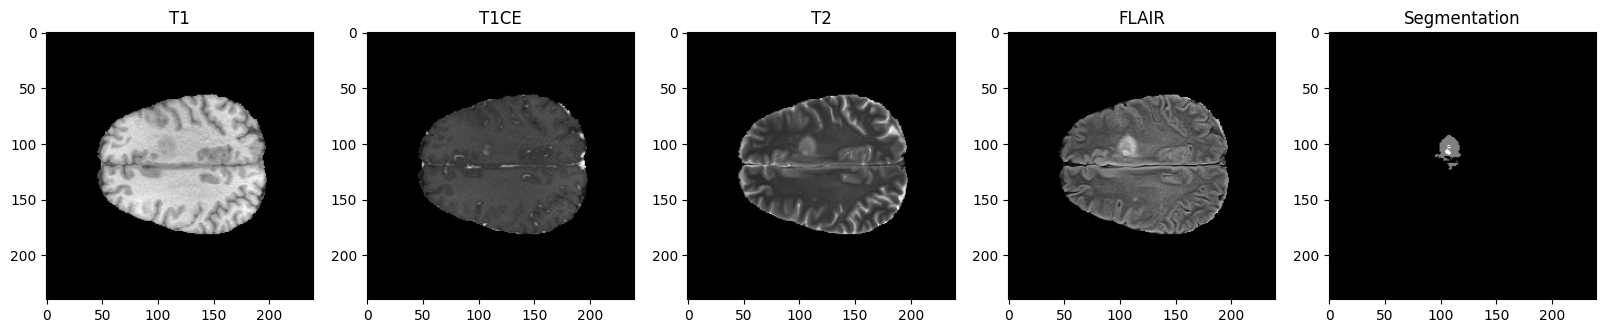

Displaying LGG images...
Modality shape (T1): (240, 240, 155)
Modality shape (T1CE): (240, 240, 155)
Modality shape (T2): (240, 240, 155)
Modality shape (FLAIR): (240, 240, 155)
Segmentation shape: (240, 240, 155)


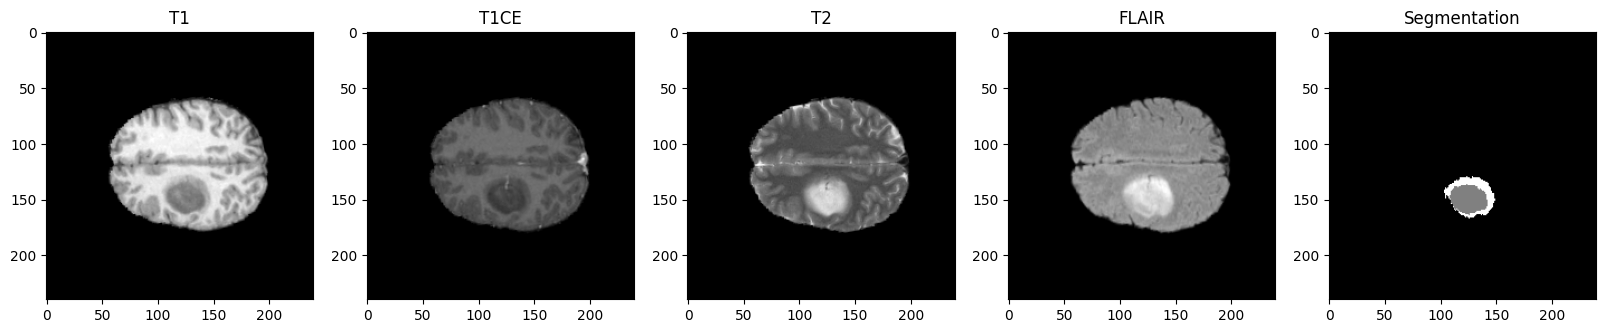

In [11]:

import nibabel as nib
import matplotlib.pyplot as plt
import os

# Define paths to HGG and LGG directories
hgg_paths = [
    '/content/Testing/HGG/BraTS19_CBICA_ARZ_1/BraTS19_CBICA_ARZ_1_flair.nii.gz',
    '/content/Testing/HGG/BraTS19_CBICA_ARZ_1/BraTS19_CBICA_ARZ_1_seg.nii.gz',
    '/content/Testing/HGG/BraTS19_CBICA_ARZ_1/BraTS19_CBICA_ARZ_1_t1.nii.gz',
    '/content/Testing/HGG/BraTS19_CBICA_ARZ_1/BraTS19_CBICA_ARZ_1_t1ce.nii.gz',
    '/content/Testing/HGG/BraTS19_CBICA_ARZ_1/BraTS19_CBICA_ARZ_1_t2.nii.gz',
]

lgg_paths = [
    '/content/Testing/LGG/BraTS19_2013_24_1/BraTS19_2013_24_1_flair.nii.gz',
    '/content/Testing/LGG/BraTS19_2013_24_1/BraTS19_2013_24_1_seg.nii.gz',
    '/content/Testing/LGG/BraTS19_2013_24_1/BraTS19_2013_24_1_t1.nii.gz',
    '/content/Testing/LGG/BraTS19_2013_24_1/BraTS19_2013_24_1_t1ce.nii.gz',
    '/content/Testing/LGG/BraTS19_2013_24_1/BraTS19_2013_24_1_t2.nii.gz',
]

def display_images(patient_paths):
    for sample_paths in patient_paths:
        # Check if all files exist
        if not all(os.path.exists(p) for p in sample_paths):
            print(f"Files missing for paths: {sample_paths}, skipping...")
            continue

        # Load the 4 MRI modalities and the segmentation located in the patient's path using the nibabel library
        t1_img = nib.load(sample_paths[2])
        t1ce_img = nib.load(sample_paths[3])
        t2_img = nib.load(sample_paths[4])
        flair_img = nib.load(sample_paths[0])
        seg_img = nib.load(sample_paths[1])

        # Get the image data
        t1_data = t1_img.get_fdata()
        t1ce_data = t1ce_img.get_fdata()
        t2_data = t2_img.get_fdata()
        flair_data = flair_img.get_fdata()
        seg_data = seg_img.get_fdata()

        # Print the shapes of the images
        print(f"Modality shape (T1): {t1_data.shape}")
        print(f"Modality shape (T1CE): {t1ce_data.shape}")
        print(f"Modality shape (T2): {t2_data.shape}")
        print(f"Modality shape (FLAIR): {flair_data.shape}")
        print(f"Segmentation shape: {seg_data.shape}")

        # Plot the 100th slice of the 4 MRI modalities and the segmentation
        slice_nb = 100

        fig, axs = plt.subplots(1, 5, figsize=(20, 20))
        axs[0].imshow(t1_data[:, :, slice_nb], cmap="gray")
        axs[0].set_title('T1')
        axs[1].imshow(t1ce_data[:, :, slice_nb], cmap="gray")
        axs[1].set_title('T1CE')
        axs[2].imshow(t2_data[:, :, slice_nb], cmap="gray")
        axs[2].set_title('T2')
        axs[3].imshow(flair_data[:, :, slice_nb], cmap="gray")
        axs[3].set_title('FLAIR')
        axs[4].imshow(seg_data[:, :, slice_nb], cmap="gray")
        axs[4].set_title('Segmentation')
        plt.show()

# Convert single paths to lists of paths
hgg_patient_paths = [hgg_paths]
lgg_patient_paths = [lgg_paths]

# Display images for HGG patients
print("Displaying HGG images...")
display_images(hgg_patient_paths)

# Display images for LGG patients
print("Displaying LGG images...")
display_images(lgg_patient_paths)


In [1]:

import os
import numpy as np
import random
import matplotlib.pyplot as plt
import SimpleITK as sitk
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose, concatenate, Dropout
from keras.optimizers import Adam
from keras.losses import binary_crossentropy

# Define the folder paths
hgg_folder = "/content/training/HGG"
lgg_folder = "/content/training/LGG"

# Function to get file paths
def get_file_paths(folder):
    file_paths = []
    for root, dirs, files in os.walk(folder):
        for file in files:
            if file.endswith(".nii.gz"):  # Assuming NIfTI format
                file_paths.append(os.path.join(root, file))
    return file_paths

# Get file paths from each folder
hgg_file_paths = get_file_paths(hgg_folder)
lgg_file_paths = get_file_paths(lgg_folder)

# Combine the file paths from both folders
file_paths = hgg_file_paths + lgg_file_paths

# Split dataset into train, validation, and test sets
train_files, test_files = train_test_split(file_paths, test_size=0.2, random_state=42)
train_files, val_files = train_test_split(train_files, test_size=0.1, random_state=42)

# Define U-Net model with dropout
def unet_model_with_dropout(input_shape, dropout_rate=0.5):
    inputs = Input(input_shape)

    # Encoder
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    # Bottleneck
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    drop3 = Dropout(dropout_rate)(conv3)

    # Decoder
    up4 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(drop3)
    up4 = concatenate([up4, conv2], axis=3)
    conv4 = Conv2D(64, (3, 3), activation='relu', padding='same')(up4)
    conv4 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv4)

    up5 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(conv4)
    up5 = concatenate([up5, conv1], axis=3)
    conv5 = Conv2D(32, (3, 3), activation='relu', padding='same')(up5)
    conv5 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv5)

    # Output
    outputs = Conv2D(1, (1, 1), activation='sigmoid')(conv5)

    model = Model(inputs=[inputs], outputs=[outputs])
    return model

# Define data generators for training and validation
def data_generator(file_paths, batch_size=32):
    while True:
        batch_paths = np.random.choice(file_paths, size=batch_size)
        batch_images = []
        batch_masks = []
        for path in batch_paths:
            # Load and preprocess image and mask (You need to implement these functions)
            image = load_and_preprocess_image(path)
            mask = load_and_preprocess_mask(path)
            batch_images.append(image)
            batch_masks.append(mask)
        yield np.array(batch_images), np.array(batch_masks)

# Function to load and preprocess images
def load_and_preprocess_image(image_path, target_shape=(128, 128, 128), sigma=1):
    img = sitk.ReadImage(image_path)
    img_array = sitk.GetArrayFromImage(img)
    resized_img = resize(img_array, target_shape, anti_aliasing=True)
    return resized_img

# Function to load and preprocess segmentation masks
def load_and_preprocess_mask(mask_path, target_shape=(128, 128, 128)):
    mask = sitk.ReadImage(mask_path)
    mask_array = sitk.GetArrayFromImage(mask)
    resized_mask = resize(mask_array, target_shape, anti_aliasing=False)
    # Assuming the mask values need to be thresholded
    threshold = 0.5  # You can adjust the threshold as needed
    thresholded_mask = (resized_mask > threshold).astype(np.uint8)
    return thresholded_mask

# Compile the model with dropout
model = unet_model_with_dropout(input_shape=(128, 128, 128))
model.compile(optimizer=Adam(), loss=binary_crossentropy, metrics=['accuracy'])

# Define batch size and epochs
batch_size = 32
epochs = 1

# Train the model
history = model.fit(data_generator(train_files, batch_size=batch_size),
                    steps_per_epoch=len(train_files) // batch_size,
                    epochs=epochs,
                    validation_data=data_generator(val_files, batch_size=batch_size),
                    validation_steps=len(val_files) // batch_size)

# Evaluate the model
evaluation = model.evaluate(data_generator(test_files), steps=len(test_files) // batch_size)




4/4 [==============================] - 94s 29s/step - loss: 1.5326e-04 - accuracy: 1.0000


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 128)]      0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 128, 128, 32)         36896     ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 128, 128, 32)         9248      ['conv2d[0][0]']              
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)           0         ['conv2d_1[0][0]']            
 D)                                                                                           

In [ ]:

# Save the model
model.save("brain_tumor_segmentation_model.keras")

In [ ]:
import matplotlib.pyplot as plt
import SimpleITK as sitk
from skimage.transform import resize
import numpy as np
import os
from tensorflow.keras.models import load_model

def display_resized_images_with_tumor_segmentation(image_path, mask_path, model, target_size=(256, 256), model_input_shape=(128, 128, 128)):
    # Load the NIfTI image using SimpleITK
    img = sitk.ReadImage(image_path)
    img_array = sitk.GetArrayFromImage(img)

    # Load the segmentation mask
    mask_img = sitk.ReadImage(mask_path)
    mask_array = sitk.GetArrayFromImage(mask_img)

    # Resize the image and mask
    img_resized = resize(img_array, target_size, anti_aliasing=True)
    mask_resized = resize(mask_array, target_size, anti_aliasing=False)

    # Normalize image to [0, 1]
    img_resized = img_resized / np.max(img_resized)

    # Resize the image to match the model input shape
    img_resized_input_shape = resize(img_resized, model_input_shape, anti_aliasing=True)

    # Predict the segmentation mask using the model
    predicted_mask = model.predict(np.expand_dims(img_resized_input_shape, axis=0))[0]

    # Resize the predicted mask to match the size of the ground truth mask
    predicted_mask_resized = resize(predicted_mask, target_size, anti_aliasing=True)

    # Display the original image, ground truth mask, and predicted mask
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    axes[0].imshow(img_resized[:, :, target_size[1] // 2], cmap='gray')
    axes[0].set_title("Resized Original Image")
    axes[0].axis('off')

    # axes[1].imshow(mask_resized[:, :, target_size[1] // 2], cmap='gray')
    # axes[1].set_title("Original Mask")
    # axes[1].axis('off')

     # Show the resized original image with the ground truth mask overlaid
    axes[1].imshow(img_resized[:, :, target_size[1] // 2], cmap='gray')
    axes[1].imshow(mask_resized[:, :, target_size[1] // 2], cmap='jet', alpha=0.5)
    axes[1].set_title("Ground Truth Mask")
    axes[1].axis('off')

    plt.show()

# Load your trained model
model = load_model("/content/brain_tumor_segmentation_model.keras")  # Load your trained model here

# Function to display images based on input paths
def display_images_for_given_paths(image_path, mask_path):
    print(f"Displaying image and mask from: {image_path} and {mask_path}")
    display_resized_images_with_tumor_segmentation(image_path, mask_path, model)

# Example usage
image_path = "/content/Testing/HGG/BraTS19_CBICA_ASG_1/BraTS19_CBICA_ASG_1_flair.nii.gz"
mask_path = "/content/Testing/HGG/BraTS19_CBICA_ASG_1/BraTS19_CBICA_ASG_1_seg.nii.gz"

display_images_for_given_paths(image_path, mask_path)


Displaying image and mask from: /content/Testing/HGG/BraTS19_CBICA_ASG_1/BraTS19_CBICA_ASG_1_flair.nii.gz and /content/Testing/HGG/BraTS19_CBICA_ASG_1/BraTS19_CBICA_ASG_1_seg.nii.gz


In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# 5. Model Evaluation on Validation Set
validation_generator = data_generator(val_files, batch_size=batch_size)
validation_steps = len(val_files) // batch_size

validation_evaluation = model.evaluate(validation_generator, steps=validation_steps)
print("Validation Loss:", validation_evaluation[0])
print("Validation Accuracy:", validation_evaluation[1])

# 6. Model Evaluation on Test Set
test_generator = data_generator(test_files, batch_size=batch_size)
test_steps = len(test_files) // batch_size

test_evaluation = model.evaluate(test_generator, steps=test_steps)
print("Test Loss:", test_evaluation[0])
print("Test Accuracy:", test_evaluation[1])


In [ ]:
def evaluate_model(model, test_images, test_masks):
    results = model.evaluate(test_images, test_masks, verbose=1)
    print(f"Test Loss: {results[0]}, Test Accuracy: {results[1]}")

    # Additional metrics
    dice_scores = []
    for i in range(len(test_images)):
        prediction = model.predict(np.expand_dims(test_images[i], axis=0))
        dice_score = dice_coefficient(prediction, test_masks[i])
        dice_scores.append(dice_score)

    average_dice_score = np.mean(dice_scores)
    print(f"Average Dice Score: {average_dice_score}")

def dice_coefficient(predicted, ground_truth, smooth=1):
    predicted = predicted.flatten()
    ground_truth = ground_truth.flatten()
    intersection = np.sum(predicted * ground_truth)
    return (2. * intersection + smooth) / (np.sum(predicted) + np.sum(ground_truth) + smooth)


In [ ]:
import matplotlib.pyplot as plt
import SimpleITK as sitk
from skimage.transform import resize
import numpy as np
from tensorflow.keras.models import load_model

def display_resized_images_with_tumor_segmentation(image_path, mask_path, model, target_size=(256, 256), model_input_shape=(128, 128, 128)):
    # Load the NIfTI image using SimpleITK
    img = sitk.ReadImage(image_path)
    img_array = sitk.GetArrayFromImage(img)

    # Load the segmentation mask
    mask_img = sitk.ReadImage(mask_path)
    mask_array = sitk.GetArrayFromImage(mask_img)

    # Resize the image and mask
    img_resized = resize(img_array, target_size, anti_aliasing=True)
    mask_resized = resize(mask_array, target_size, anti_aliasing=False)

    # Normalize image to [0, 1]
    img_resized = img_resized / np.max(img_resized)

    # Resize the image to match the model input shape
    img_resized_input_shape = resize(img_resized, model_input_shape, anti_aliasing=True)

    # Predict the segmentation mask using the model
    predicted_mask = model.predict(np.expand_dims(img_resized_input_shape, axis=0))[0]



    # Resize the predicted mask to match the size of the ground truth mask
    predicted_mask_resized = resize(predicted_mask, target_size, anti_aliasing=True)

    # Print shape of resized predicted mask for debugging
    print(f"Resized predicted mask shape: {predicted_mask_resized.shape}")

    # Display the original image, ground truth mask, and predicted mask
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))


    axes[0].imshow(img_resized[:, :, target_size[1] // 2], cmap='gray')
    axes[0].set_title("Resized Original Image")
    axes[0].axis('off')

    axes[1].imshow(mask_resized[:, :, target_size[1] // 2], cmap='gray')
    axes[1].set_title("Original Mask")
    axes[1].axis('off')

     # Show the resized original image with the ground truth mask overlaid
    axes[2].imshow(img_resized[:, :, target_size[1] // 2], cmap='gray')
    axes[2].imshow(mask_resized[:, :, target_size[1] // 2], cmap='jet', alpha=0.5)
    axes[2].set_title("Resized Original Image with Ground Truth Mask")
    axes[2].axis('off')

    plt.show()

# Load your trained model
model = load_model("/content/brain_tumor_segmentation_model.keras")  # Load your trained model here

# Function to display images based on input paths
def display_images_for_given_paths(image_path, mask_path):
    print(f"Displaying image and mask from: {image_path} and {mask_path}")
    display_resized_images_with_tumor_segmentation(image_path, mask_path, model)

# Example usage
image_path = "/content/Testing/HGG/BraTS19_CBICA_ASG_1/BraTS19_CBICA_ASG_1_flair.nii.gz"
mask_path = "/content/Testing/HGG/BraTS19_CBICA_ASA_1/BraTS19_CBICA_ASA_1_seg.nii.gz"

display_images_for_given_paths(image_path, mask_path)
